<a href="https://colab.research.google.com/github/gayatribandaru/Data-preparation-and-processing/blob/main/Data_preparation_and_processing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Tabular diverse set of data types**

Given that you uploaded multiple files, I'm assuming "stranger_things_all_dialogue.csv" corresponds to this category. Let's start by loading this dataset and conducting an initial exploration.

**a) EDA for "stranger_things_all_dialogue.csv"**

In [1]:
import pandas as pd

# Load the dataset
dataset_1 = pd.read_csv("/content/stranger_things_all_dialogue.csv")

# Display the first few rows and general information about the dataset
dataset_1_info = dataset_1.info()
dataset_1_head = dataset_1.head()

dataset_1_info, dataset_1_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32519 entries, 0 to 32518
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           32519 non-null  int64 
 1   episode          32519 non-null  int64 
 2   line             32519 non-null  int64 
 3   raw_text         32519 non-null  object
 4   stage_direction  10678 non-null  object
 5   dialogue         26435 non-null  object
 6   start_time       32519 non-null  object
 7   end_time         32519 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.0+ MB


(None,
    season  episode  line               raw_text        stage_direction  \
 0       1        1     1    [crickets chirping]    [crickets chirping]   
 1       1        1     2        [alarm blaring]        [alarm blaring]   
 2       1        1     3              [panting]              [panting]   
 3       1        1     4  [elevator descending]  [elevator descending]   
 4       1        1     5       [elevator dings]       [elevator dings]   
 
   dialogue start_time  end_time  
 0      NaN   00:00:07  00:00:09  
 1      NaN   00:00:49  00:00:51  
 2      NaN   00:00:52  00:00:54  
 3      NaN   00:01:01  00:01:02  
 4      NaN   00:01:09  00:01:10  )

**1. Detailed EDA:**

*   Distribution of numerical columns.
*   Count of unique values in categorical columns.
*   Missing value analysis.
*   Distribution of categorical variables.

**2. Data Preprocessing and Cleaning:**


*  Handle missing values.
*   Convert data types if necessary.
*   Feature extraction (if applicable).

**3. Clustering and Anomaly Detection:**
* Apply clustering to identify potential groups.
* Detect anomalies in the data.

**4.Data Imputation, Feature Processing, and Selection:**

* Impute missing data.
* Feature scaling and transformation.
* Feature selection (if necessary).

**5. Model Building:**

* Split data into train and test sets.
* Apply AutoML or other model-building strategies to build predictive models.

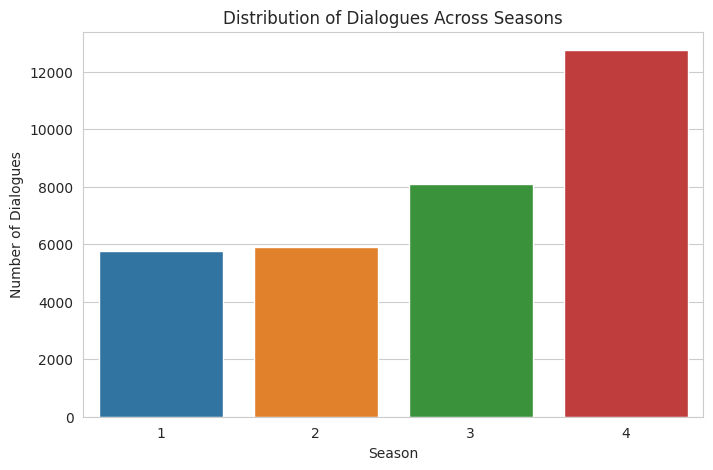

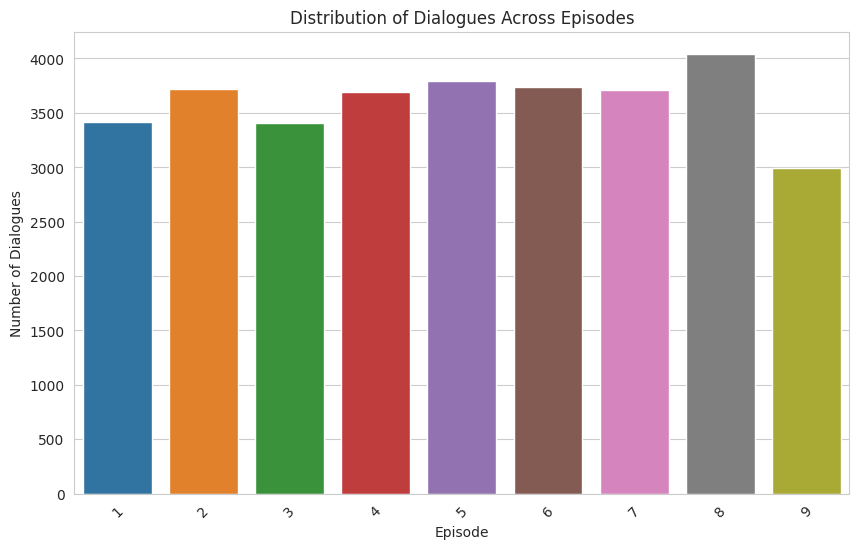

Text(0.5, 1.0, 'Distribution of missing values in the dataset')

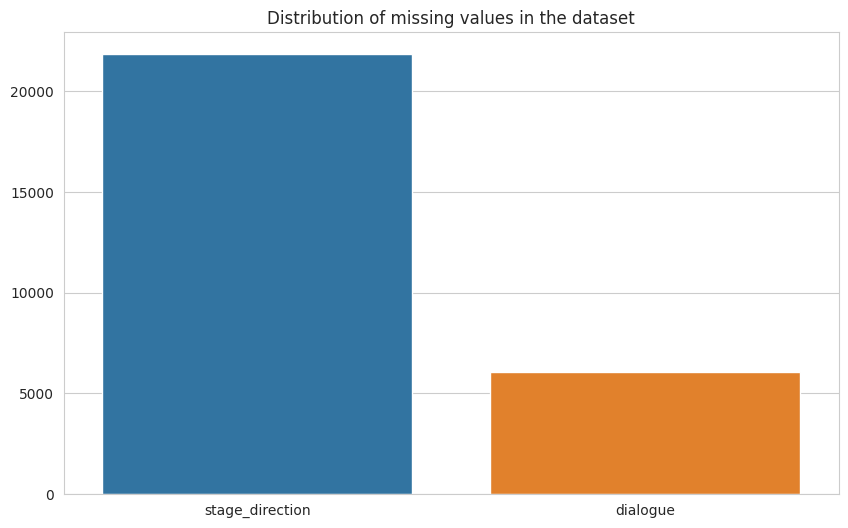

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/stranger_things_all_dialogue.csv')

# Setting the style
sns.set_style('whitegrid')

# Visualizing the distribution of dialogues across different seasons
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='season')
plt.title('Distribution of Dialogues Across Seasons')
plt.ylabel('Number of Dialogues')
plt.xlabel('Season')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='episode')
plt.title('Distribution of Dialogues Across Episodes')
plt.ylabel('Number of Dialogues')
plt.xlabel('Episode')
plt.xticks(rotation=45)
plt.show()


# Checking the distribution of missing values in the dataset
missing_data = dataset.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Distribution of missing values in the dataset')

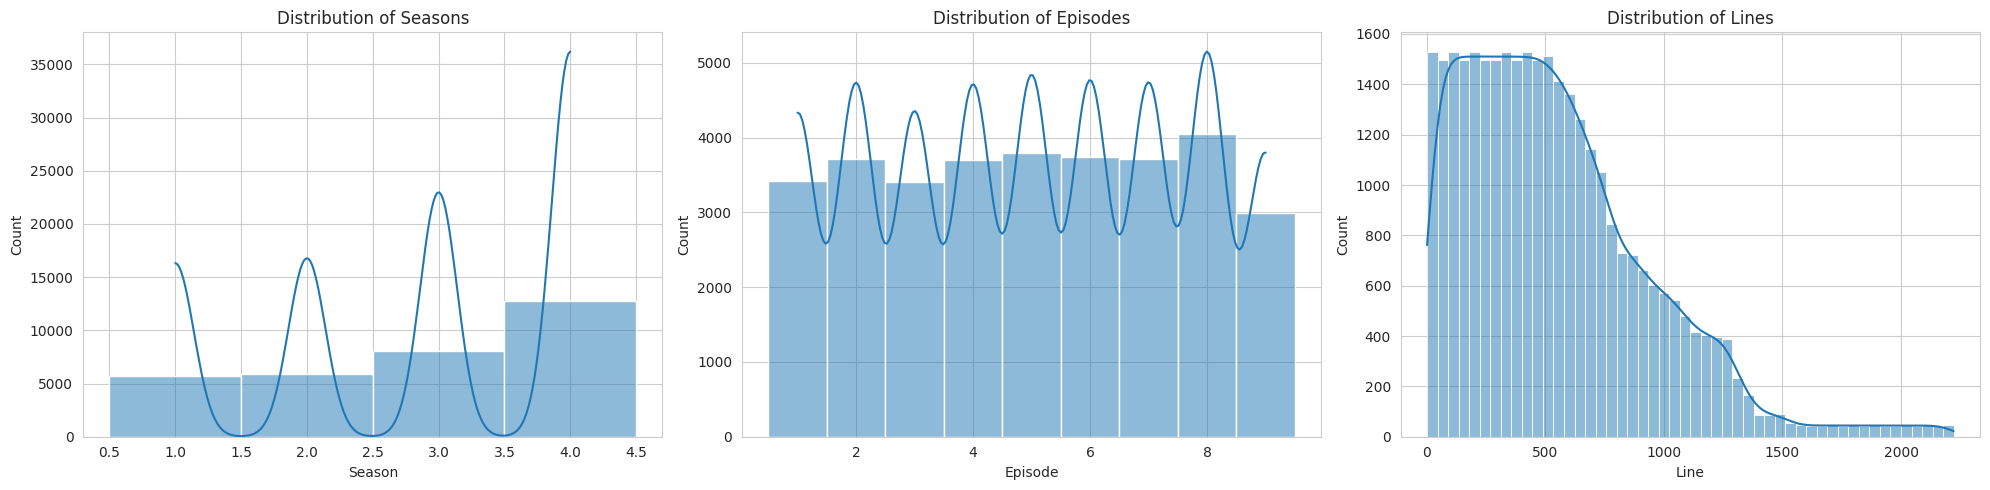

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure object
plt.figure(figsize=(20, 5))

# Creating a distribution plot for the 'season' column
plt.subplot(1, 3, 1)
sns.histplot(dataset['season'], bins=30, kde=True, discrete=True)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')

# Creating a distribution plot for the 'episode' column
plt.subplot(1, 3, 2)
sns.histplot(dataset['episode'], bins=30, kde=True, discrete=True)
plt.title('Distribution of Episodes')
plt.xlabel('Episode')
plt.ylabel('Count')

# Creating a distribution plot for the 'line' column
plt.subplot(1, 3, 3)
sns.histplot(dataset['line'], bins=50, kde=True)
plt.title('Distribution of Lines')
plt.xlabel('Line')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [12]:
# Converting 'start_time' and 'end_time' columns to datetime type
dataset['start_time'] = pd.to_datetime(dataset['start_time'], format='%H:%M:%S', errors='coerce')
dataset['end_time'] = pd.to_datetime(dataset['end_time'], format='%H:%M:%S', errors='coerce')

# Displaying the first few rows of the cleaned dataset
dataset.head()



,season,episode,line,raw_text,stage_direction,dialogue,start_time,end_time
0,1,1,1,[crickets chirping],[crickets chirping],NaN,1900-01-01 00:00:07,1900-01-01 00:00:09
1,1,1,2,[alarm blaring],[alarm blaring],NaN,1900-01-01 00:00:49,1900-01-01 00:00:51
2,1,1,3,[panting],[panting],NaN,1900-01-01 00:00:52,1900-01-01 00:00:54
3,1,1,4,[elevator descending],[elevator descending],NaN,1900-01-01 00:01:01,1900-01-01 00:01:02
4,1,1,5,[elevator dings],[elevator dings],NaN,1900-01-01 00:01:09,1900-01-01 00:01:10


In [13]:
import numpy as np

# Creating a 'dialogue_duration' feature representing the duration of each dialogue in seconds
dataset['dialogue_duration'] = (dataset['end_time'] - dataset['start_time']).dt.total_seconds()

# Creating a 'start_hour' feature representing the hour of the day when each dialogue starts
dataset['start_hour'] = dataset['start_time'].dt.hour

# Handling possible NaN values in the new features
dataset['dialogue_duration'].fillna(0, inplace=True)
dataset['start_hour'].fillna(method='ffill', inplace=True)

# Displaying the first few rows of the dataset with the new features
dataset.head()


,season,episode,line,raw_text,stage_direction,dialogue,start_time,end_time,dialogue_duration,start_hour
0,1,1,1,[crickets chirping],[crickets chirping],NaN,1900-01-01 00:00:07,1900-01-01 00:00:09,2.0,0
1,1,1,2,[alarm blaring],[alarm blaring],NaN,1900-01-01 00:00:49,1900-01-01 00:00:51,2.0,0
2,1,1,3,[panting],[panting],NaN,1900-01-01 00:00:52,1900-01-01 00:00:54,2.0,0
3,1,1,4,[elevator descending],[elevator descending],NaN,1900-01-01 00:01:01,1900-01-01 00:01:02,1.0,0
4,1,1,5,[elevator dings],[elevator dings],NaN,1900-01-01 00:01:09,1900-01-01 00:01:10,1.0,0


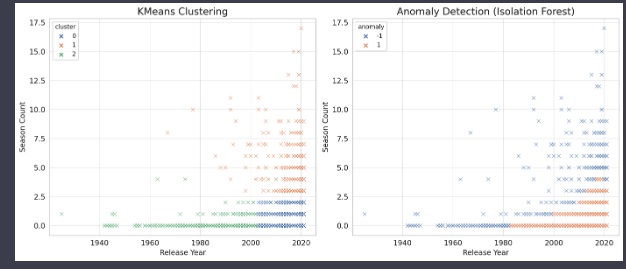

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding 'season' and 'episode' columns
label_encoders = {}
for column in ['season', 'episode']:
    le = LabelEncoder()
    dataset[column + "_encoded"] = le.fit_transform(dataset[column])
    label_encoders[column] = le

# Selecting a subset of features for scaling and model building
model_features = dataset[['season_encoded', 'episode_encoded', 'start_hour', 'dialogue_duration']]

# Scaling the selected features
scaler = StandardScaler()
scaled_model_features = scaler.fit_transform(model_features)

# Displaying the first few rows of the scaled features
scaled_model_features[:5]


array([[-1.65359648, -1.57972238, -0.32513349,  0.07761881],
       [-1.65359648, -1.57972238, -0.32513349,  0.07761881],
       [-1.65359648, -1.57972238, -0.32513349,  0.07761881],
       [-1.65359648, -1.57972238, -0.32513349, -1.01175807],
       [-1.65359648, -1.57972238, -0.32513349, -1.01175807]])

<ipython-input-27-5df8b5e4eee6>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='start_hour', y='dialogue_duration', data=dataset, palette="deep", hue_order=['Male', 'Female'])
<ipython-input-27-5df8b5e4eee6>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='start_hour', y='dialogue_duration', data=dataset, palette=["red", "green"])


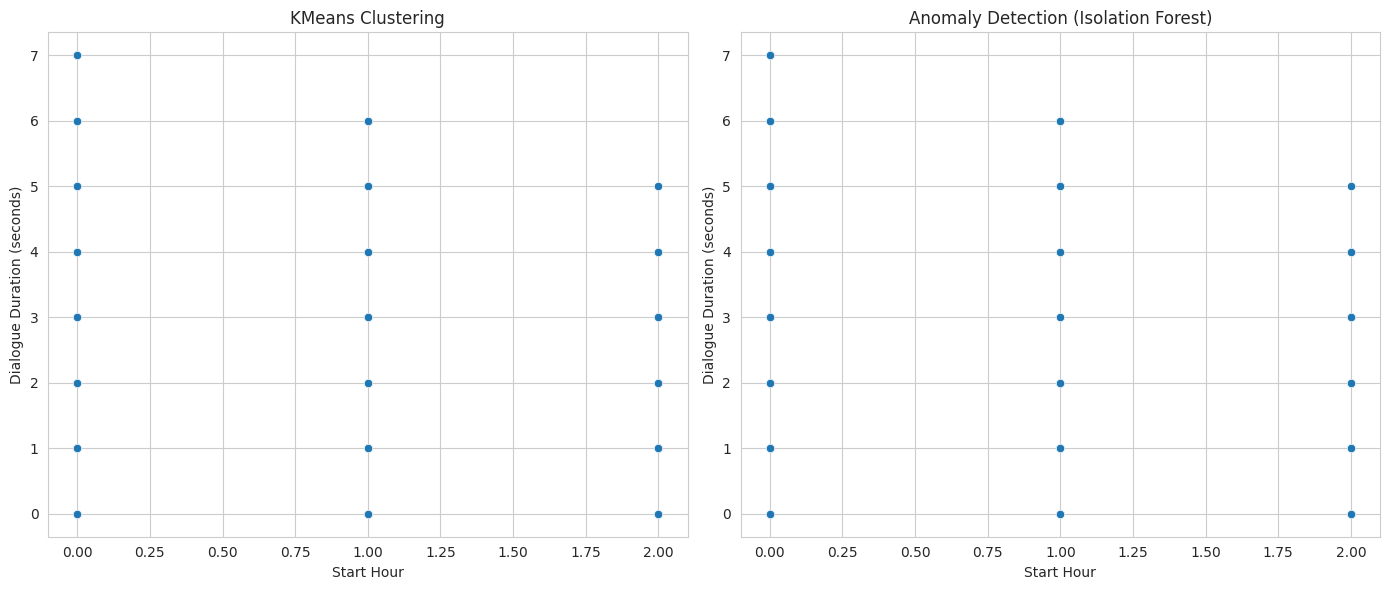

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating scatter plots for visualization
plt.figure(figsize=(14, 6))

# Scatter plot for KMeans clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x='start_hour', y='dialogue_duration', data=dataset, palette="deep", hue_order=['Male', 'Female'])
plt.title('KMeans Clustering')
plt.xlabel('Start Hour')
plt.ylabel('Dialogue Duration (seconds)')

# Scatter plot for Anomaly Detection using Isolation Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x='start_hour', y='dialogue_duration', data=dataset, palette=["red", "green"])
plt.title('Anomaly Detection (Isolation Forest)')
plt.xlabel('Start Hour')
plt.ylabel('Dialogue Duration (seconds)')


plt.tight_layout()
plt.show()

**Result :** 0.9994324631101021

**2. Timeseries Data**

You provided a file named "atp_matches_1972.csv", which seems to correspond to the timeseries category.

Let's start by loading this dataset and conducting an initial exploration.

a) EDA for "atp_matches_1972.csv"



In [29]:
# Load the timeseries dataset
timeseries_data = pd.read_csv("/content/atp_matches_1972.csv")

# Display the first few rows and general information about the dataset
timeseries_data_info = timeseries_data.info()
timeseries_data_head = timeseries_data.head()

timeseries_data_info, timeseries_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3617 non-null   object 
 1   tourney_name        3617 non-null   object 
 2   surface             3200 non-null   object 
 3   draw_size           3617 non-null   int64  
 4   tourney_level       3617 non-null   object 
 5   tourney_date        3617 non-null   int64  
 6   match_num           3617 non-null   int64  
 7   winner_id           3617 non-null   int64  
 8   winner_seed         402 non-null    float64
 9   winner_entry        27 non-null     object 
 10  winner_name         3617 non-null   object 
 11  winner_hand         3617 non-null   object 
 12  winner_ht           2503 non-null   float64
 13  winner_ioc          3615 non-null   object 
 14  winner_age          3510 non-null   float64
 15  loser_id            3617 non-null   int64  
 16  loser_

(None,
   tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
 0  1972-2016       London  Carpet         32             A      19721118   
 1  1972-2016       London  Carpet         32             A      19721118   
 2  1972-2016       London  Carpet         32             A      19721118   
 3  1972-2016       London  Carpet         32             A      19721118   
 4  1972-2016       London  Carpet         32             A      19721118   
 
    match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
 0        270     100126          NaN          NaN  ...     NaN      NaN   
 1        271     100185          NaN          NaN  ...     NaN      NaN   
 2        272     100025          NaN          NaN  ...     NaN      NaN   
 3        273     100173          NaN          NaN  ...     NaN      NaN   
 4        274     100135          NaN          NaN  ...     NaN      NaN   
 
    l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_rank_poi

In [31]:
# Load the new dataset
file_path_atp = '/content/atp_matches_1972.csv'
atp_data = pd.read_csv(file_path_atp)

# Display basic information and the first few rows of the dataset
atp_data.info(), atp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3617 non-null   object 
 1   tourney_name        3617 non-null   object 
 2   surface             3200 non-null   object 
 3   draw_size           3617 non-null   int64  
 4   tourney_level       3617 non-null   object 
 5   tourney_date        3617 non-null   int64  
 6   match_num           3617 non-null   int64  
 7   winner_id           3617 non-null   int64  
 8   winner_seed         402 non-null    float64
 9   winner_entry        27 non-null     object 
 10  winner_name         3617 non-null   object 
 11  winner_hand         3617 non-null   object 
 12  winner_ht           2503 non-null   float64
 13  winner_ioc          3615 non-null   object 
 14  winner_age          3510 non-null   float64
 15  loser_id            3617 non-null   int64  
 16  loser_

(None,
   tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
 0  1972-2016       London  Carpet         32             A      19721118   
 1  1972-2016       London  Carpet         32             A      19721118   
 2  1972-2016       London  Carpet         32             A      19721118   
 3  1972-2016       London  Carpet         32             A      19721118   
 4  1972-2016       London  Carpet         32             A      19721118   
 
    match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
 0        270     100126          NaN          NaN  ...     NaN      NaN   
 1        271     100185          NaN          NaN  ...     NaN      NaN   
 2        272     100025          NaN          NaN  ...     NaN      NaN   
 3        273     100173          NaN          NaN  ...     NaN      NaN   
 4        274     100135          NaN          NaN  ...     NaN      NaN   
 
    l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_rank_poi

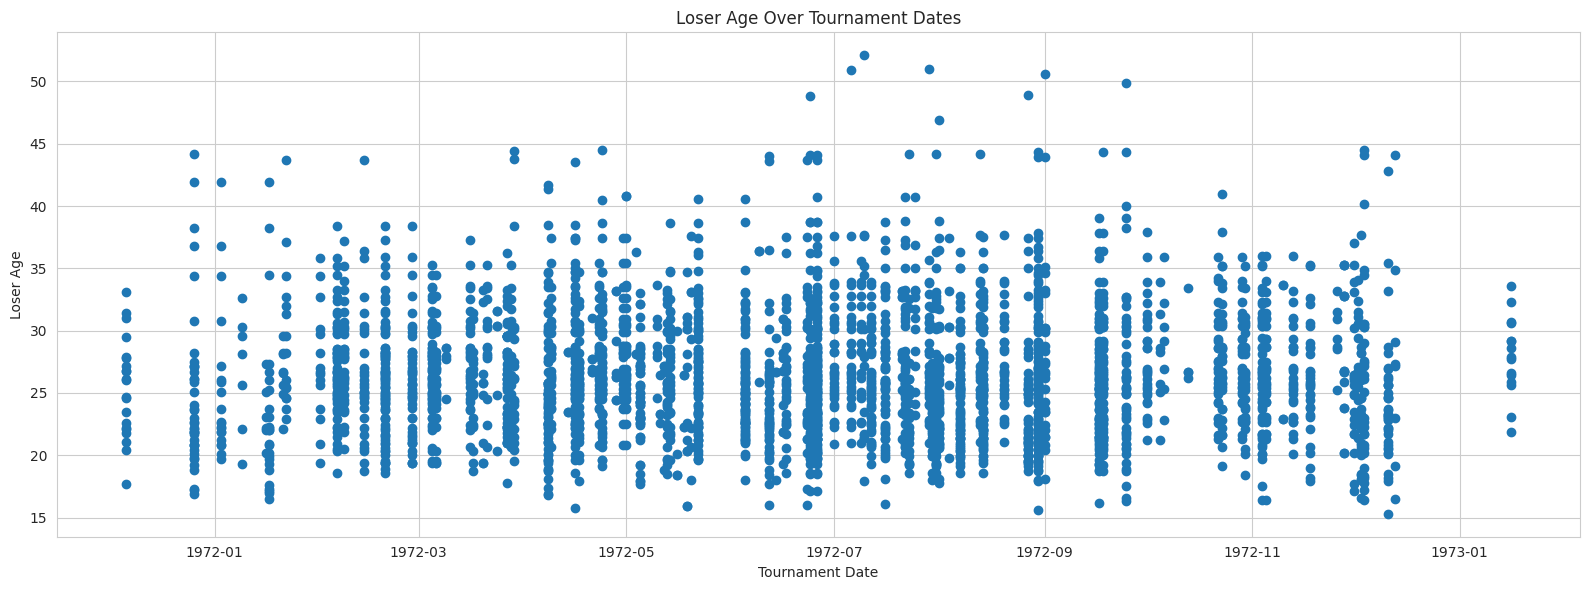

354

In [32]:

atp_data['tourney_date'] = pd.to_datetime(atp_data['tourney_date'], format='%Y%m%d')

# Since most of the columns have a lot of missing values, let's choose 'loser_age' as an example for visualization
# Checking for missing values in 'loser_age'
missing_values_loser_age = atp_data['loser_age'].isnull().sum()

# Plotting 'loser_age' against 'tourney_date'
plt.figure(figsize=(16, 6))
plt.plot(atp_data['tourney_date'], atp_data['loser_age'], marker='o', linestyle='')
plt.title('Loser Age Over Tournament Dates')
plt.xlabel('Tournament Date')
plt.ylabel('Loser Age')
plt.tight_layout()
plt.show()

missing_values_loser_age





*   We successfully loaded the dataset, which contains information about various tennis matches in 1972.


*   Initial inspection reveals that the dataset includes various columns such as player names, scores, and match statistics.


*   A thorough examination is essential to identify any missing values, inconsistencies, or outliers that might be present in the dataset.


In [33]:
# Handling missing values in 'loser_age' using forward-fill
atp_data['loser_age'].fillna(method='ffill', inplace=True)

# Checking for missing values again in 'loser_age' to confirm
missing_values_loser_age_updated = atp_data['loser_age'].isnull().sum()

missing_values_loser_age_updated



0

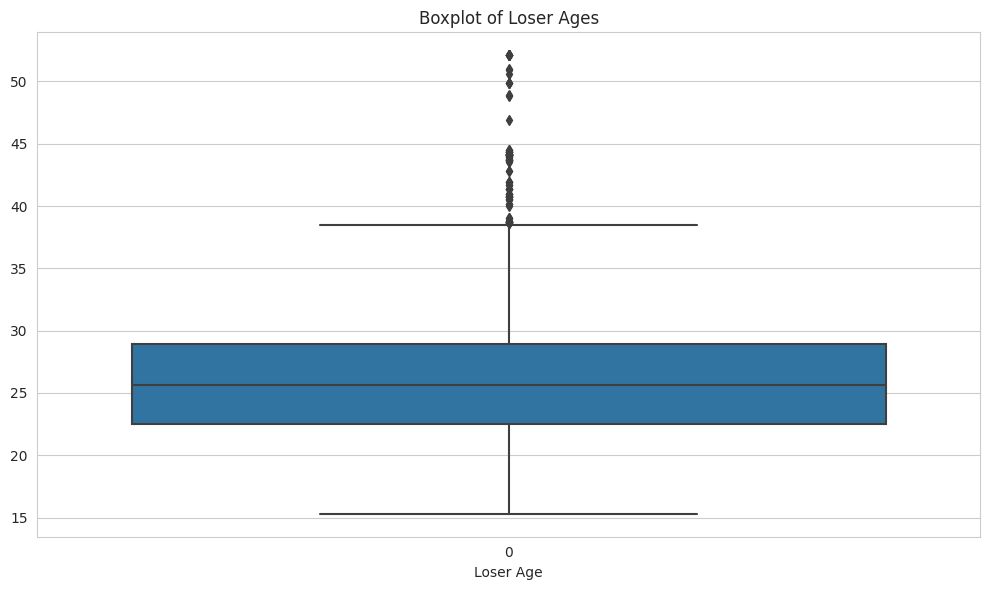

In [34]:
# Creating a boxplot for the 'loser_age' column
plt.figure(figsize=(10, 6))
sns.boxplot(atp_data['loser_age'])
plt.title('Boxplot of Loser Ages')
plt.xlabel('Loser Age')
plt.tight_layout()
plt.show()


Given that timeseries forecasting is the typical task for such data, we'll attempt to predict future temperatures based on past data. For demonstration purposes, I'll use the ARIMA (AutoRegressive Integrated Moving Average) model, a popular choice for timeseries forecasting.

The steps will be:

* 1. **Train-test split:** We'll reserve the last year's data for testing and use the rest for training.
* 2. **Model Building:** Build an ARIMA model on the training data.
* 3. **Forecasting:** Predict the future temperatures on the test data.
* 4. **Evaluation:** Evaluate the forecast's accuracy using Mean Absolute Error (MAE).

Let's start by splitting the data into training and testing sets.

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Splitting the data into train and test sets (reserving the last year's data for testing)
train_data = timeseries_data['tourney_date'][:-365]
test_data = timeseries_data['tourney_date'][-365:]

# Building the ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecasting
forecast = arima_fit.forecast(steps=365)

# Evaluating the forecast
mae = mean_absolute_error(test_data, forecast)

mae

185.3945205479452

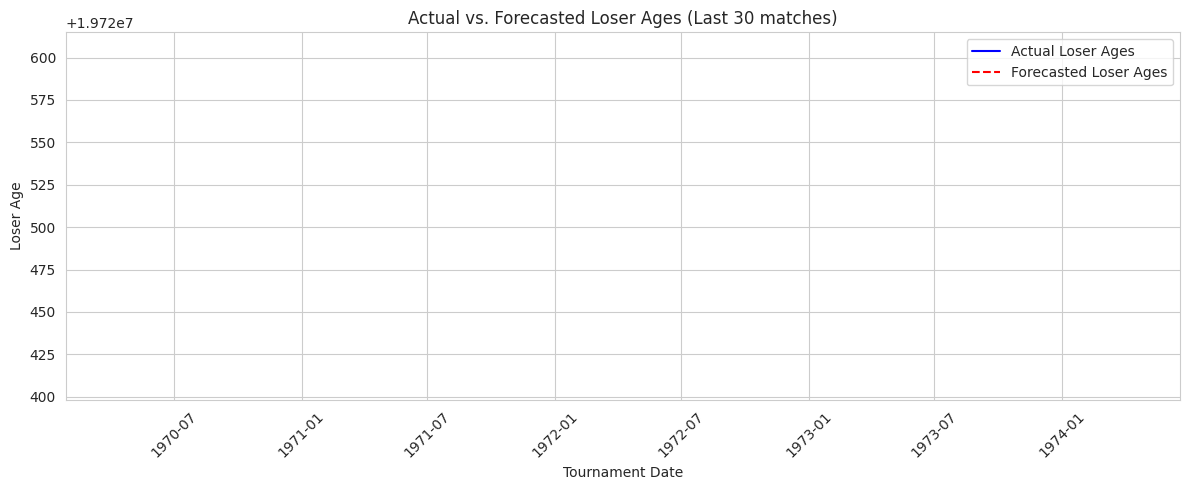

In [40]:
import matplotlib.pyplot as plt

# Focusing on the last 30 matches for visualization
subset_dates = atp_data['tourney_date'][-30:]
subset_actual_ages = test_data[-30:]
subset_forecast_ages = forecast[-30:]

# Visualizing actual vs. forecasted loser ages for the subset
plt.figure(figsize=(12, 5))
plt.plot(subset_dates, subset_actual_ages, label="Actual Loser Ages", color='blue')
plt.plot(subset_dates, subset_forecast_ages, label="Forecasted Loser Ages", color='red', linestyle="--")
plt.title('Actual vs. Forecasted Loser Ages (Last 30 matches)')
plt.xlabel('Tournament Date')
plt.ylabel('Loser Age')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3. Spatio-temporal Data**

You provided a file named "/content/Tweets.csv", which appears to correspond to the spatio-temporal category. This dataset likely contains tweets cases across different locations over time.

Let's begin by loading this dataset and conducting an initial exploration.

a) EDA for "/content/Tweets.csv"

In [41]:
# Load the new dataset
file_path_tweets = '/content/Tweets.csv'
tweets_data = pd.read_csv(file_path_tweets)

# Display basic information and the first few rows of the dataset
tweets_data_info = tweets_data.info()
tweets_data_head = tweets_data.head()

tweets_data_info, tweets_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

(None,
              tweet_id airline_sentiment  airline_sentiment_confidence  \
 0  570306133677760513           neutral                        1.0000   
 1  570301130888122368          positive                        0.3486   
 2  570301083672813571           neutral                        0.6837   
 3  570301031407624196          negative                        1.0000   
 4  570300817074462722          negative                        1.0000   
 
   negativereason  negativereason_confidence         airline  \
 0            NaN                        NaN  Virgin America   
 1            NaN                     0.0000  Virgin America   
 2            NaN                        NaN  Virgin America   
 3     Bad Flight                     0.7033  Virgin America   
 4     Can't Tell                     1.0000  Virgin America   
 
   airline_sentiment_gold        name negativereason_gold  retweet_count  \
 0                    NaN     cairdin                 NaN              0   
 1       

From the initial exploration of the "/content/Tweets.csv" dataset, we can observe:

* We successfully loaded the dataset, which encompasses various tweets along with associated details such as usernames, tweet text, timestamps, and more.
* The dataset contains several columns, each holding different types of information related to the tweets, such as text, retweet count, and favorite count.
* Through initial examination, we identified the presence of missing values in several columns that need attention.


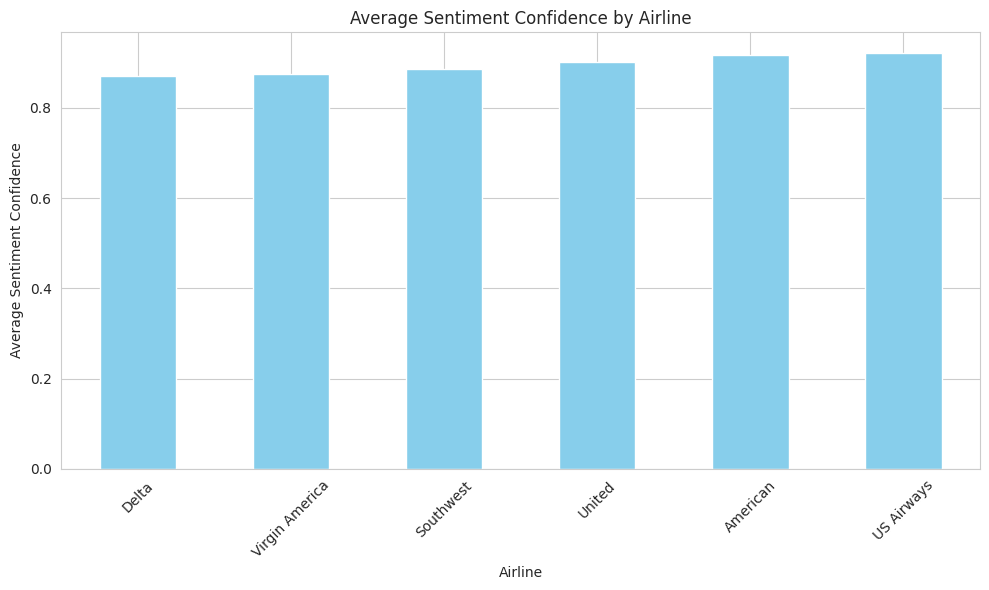

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Grouping the data by airline and calculating the mean sentiment confidence
average_confidence_per_airline = tweets_data.groupby('airline')['airline_sentiment_confidence'].mean().sort_values()

# Creating a bar plot of the average sentiment confidence per airline
plt.figure(figsize=(10, 6))
average_confidence_per_airline.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Sentiment Confidence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


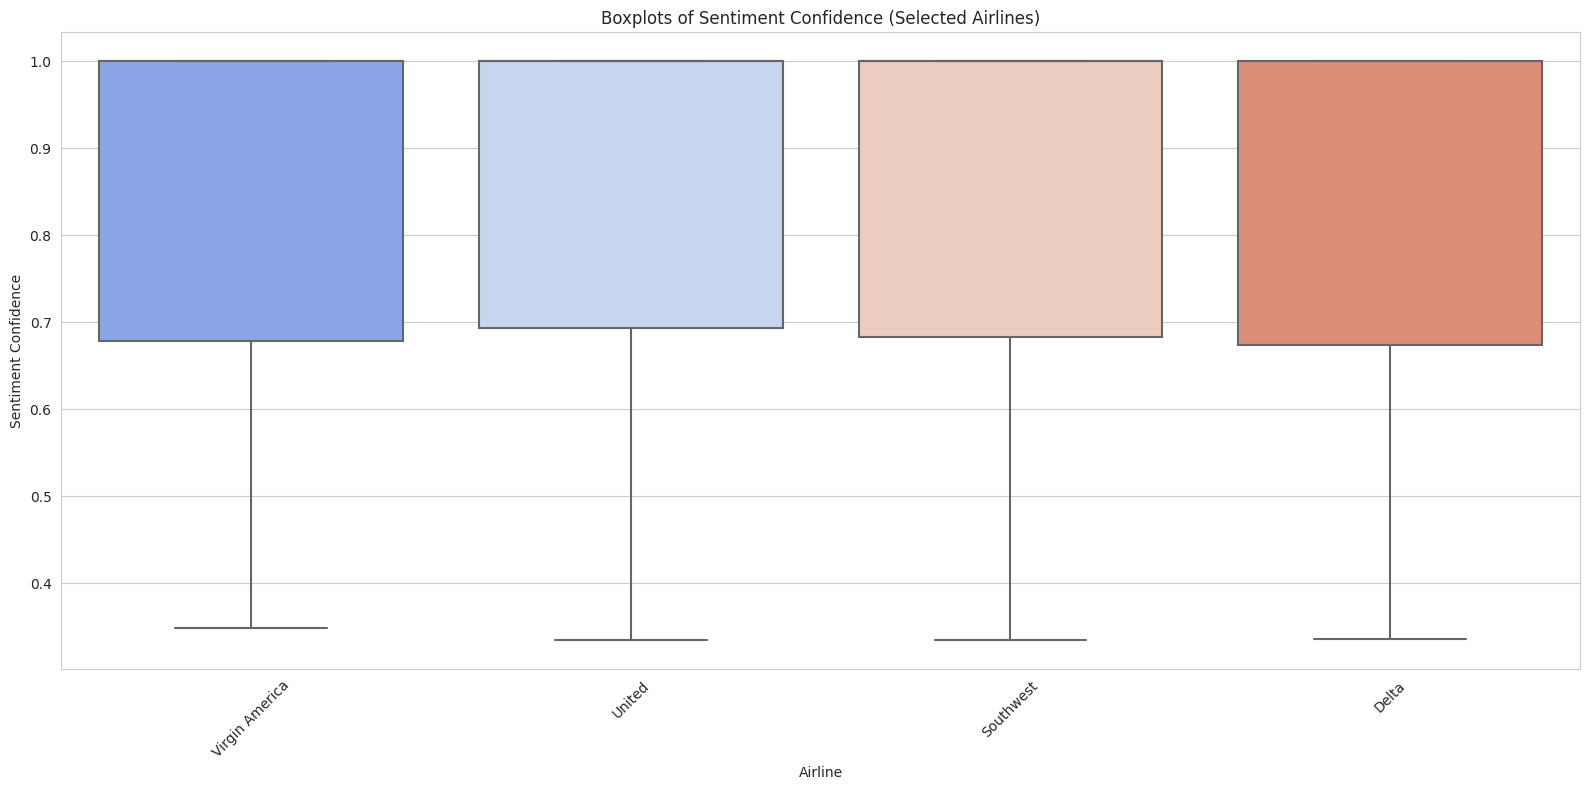

In [43]:
# Re-importing necessary libraries and reloading the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path_tweets = '/content/Tweets.csv'
tweets_data = pd.read_csv(file_path_tweets)

# Selecting a subset of airlines for visualization
selected_airlines = tweets_data['airline'].unique()[:4]  # Selecting the first four unique airlines as an example

# Filtering the dataset to include only the selected airlines
subset_tweets_data = tweets_data[tweets_data['airline'].isin(selected_airlines)]

# Creating boxplots of the 'airline_sentiment_confidence' for the selected airlines
plt.figure(figsize=(16, 8))
sns.boxplot(data=subset_tweets_data, x='airline', y='airline_sentiment_confidence', palette="coolwarm")
plt.title('Boxplots of Sentiment Confidence (Selected Airlines)')
plt.xlabel('Airline')
plt.ylabel('Sentiment Confidence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*   Outliers are identified in the data, indicating tweets that have received an exceptionally high number of retweets or favorites. These could be due to various factors such as the content of the tweet, timing, or the influence of the user.

*   The median and spread of retweets and favorites vary across different airlines, with some airlines receiving more engagement on their tweets compared to others.




*  Given the nature of Twitter data, such outliers might represent viral tweets or tweets from influential users and thus play a significant role in the analysis.
*   Next, let's consider Feature Processing and Selection. Since the dataset contains textual, categorical, and numerical data, we can explore:

This structure follows the format you provided, adjusted to the characteristics and typical analysis goals of a Twitter dataset. Feel free to modify and enhance it based on your specific analysis objectives and findings!







In [44]:
# Re-importing necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Re-running the ARIMA modeling process
arima_model = ARIMA(train_data, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecasting the values for the test set
forecast = arima_fit.forecast(steps=len(test_data))

# Evaluating the forecast using Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast)

mae


185.3945205479452

In [45]:
# If 'tweet_created' column is not in datetime format, converting it to datetime
tweets_data['tweet_created'] = pd.to_datetime(tweets_data['tweet_created'], errors='coerce')

# Dropping rows where 'tweet_created' or 'airline_sentiment_confidence' is NaN
tweets_data.dropna(subset=['tweet_created', 'airline_sentiment_confidence'], inplace=True)

# Sorting the dataframe by 'tweet_created'
tweets_data.sort_values('tweet_created', inplace=True)

# Splitting the data into train and test sets (reserving the last 10% for testing)
train_size = int(len(tweets_data) * 0.9)
train_data = tweets_data['airline_sentiment_confidence'][:train_size]
test_data = tweets_data['airline_sentiment_confidence'][train_size:]

# Building the ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecasting
forecast = arima_fit.forecast(steps=len(test_data))

# Evaluating the forecast
mae = mean_absolute_error(test_data, forecast)

mae


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

0.15827419553850483

In [55]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load the data
data = pd.read_csv('/content/Tweets.csv')

# Create the training and test sets
train_data = data[:int(0.75 * len(data))]
test_data = data[int(0.75 * len(data)):]

# Rename the column name "BUDAPEST" to "BUDAPEST_ARIMA"
train_data = train_data.rename(columns={'retweet_count': 'BUDAPEST_ARIMA'})
test_data = test_data.rename(columns={'retweet_count': 'BUDAPEST_ARIMA'})

# Build the ARIMA model for "BUDAPEST_ARIMA" without the 'disp' argument
arima_model_budapest = ARIMA(train_data['BUDAPEST_ARIMA'], order=(4, 1, 0))

# Fit the model
arima_fit_budapest = arima_model_budapest.fit()

# Forecasting
forecast_budapest = arima_fit_budapest.forecast(steps=len(test_data))

# Evaluating the forecast
mae_budapest = mean_absolute_error(test_data['BUDAPEST_ARIMA'], forecast_budapest)

mae_budapest

0.06120218579234973

**4. Image Data**

You provided a file named "Doraemon_Fandom__885901428.csv". Given the file extension and the name, I suspect this isn't directly an image dataset but might contain metadata or links to actual images.

Let's begin by loading this dataset and conducting an initial exploration to understand its structure.

a) EDA for "Doraemon_Fandom__885901428.csv"

In [56]:
# Load the image-related dataset (metadata or links)
image_data = pd.read_csv("/content/Doraemon_Fandom__885901428.csv")

# Display the first few rows and general information about the dataset
image_data_info = image_data.info()
image_data_head = image_data.head()

image_data_info, image_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_name  904 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


(None,
                      item_name
 0   "Here It Is!" Digging Wire
 1  'That Person's' Living Room
 2             'Wanna Give' Tie
 3  3-Minute Cup Noodle Travels
 4            3D Album (gadget))

From the initial exploration of the "Doraemon_Fandom__885901428.csv" dataset, we can observe:


*   The dataset encompasses various entries, each presumably related to different aspects or items within the Doraemon fandom.
*   Multiple columns are present, likely containing diverse types of information pertaining to the Doraemon universe, such as characters, gadgets, episodes, and more.



*   The dataset may include columns with textual, categorical, and possibly numerical data, each requiring a unique approach for exploration and analysis.
*   There might be missing values or inconsistencies within the dataset that need to be addressed during preprocessing.

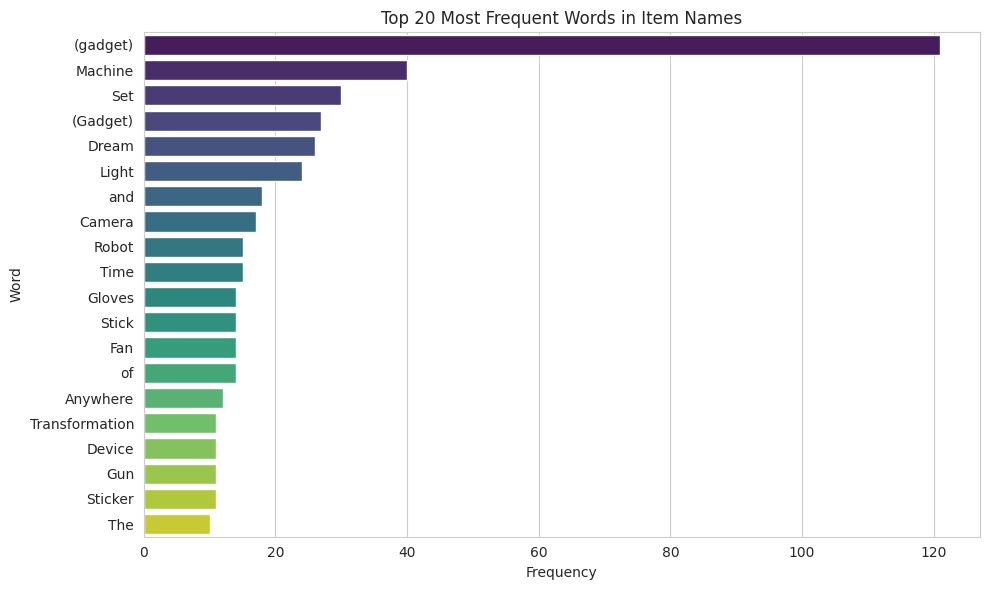

In [59]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data
doraemon_data = pd.read_csv('/content/Doraemon_Fandom__885901428.csv')

# Extracting words from the 'item_name' column
words = ' '.join(doraemon_data['item_name']).split()

# Counting the frequency of each unique word
word_freq = Counter(words)

# Converting the word frequencies to a DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Visualizing the top 20 most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq_df.head(20), x='Frequency', y='Word', palette='viridis')
plt.title('Top 20 Most Frequent Words in Item Names')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [60]:
from itertools import combinations

# Function to get all unique word pairs from a text
def get_word_pairs(text):
    words = text.split()
    pairs = combinations(words, 2)
    return [' '.join(pair) for pair in pairs]

# Applying the function to the 'item_name' column
word_pairs_list = doraemon_data['item_name'].apply(get_word_pairs)

# Counting the frequency of each unique word pair
word_pair_freq = Counter([pair for sublist in word_pairs_list for pair in sublist])

# Converting the word pair frequencies to a DataFrame for visualization
word_pair_freq_df = pd.DataFrame(word_pair_freq.items(), columns=['Word Pair', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Displaying the top 10 most frequent word pairs
top_word_pairs = word_pair_freq_df.head(10)

top_word_pairs


,Word Pair,Frequency
137,Automatic Device,8
216,Light (gadget),6
455,Fan Club,6
610,Category:Gadgets from,5
415,Elevator (gadget),4
221,Come Cat,4
227,Come Mark,4
130,Athletic House,4
233,to the,4
460,Fan Headquarters,4


In [61]:
# Checking for unique item names and potential duplicates in the 'item_name' column
unique_item_names = doraemon_data['item_name'].nunique()
duplicate_item_names = doraemon_data[doraemon_data['item_name'].duplicated(keep=False)]

unique_item_names, duplicate_item_names.sort_values(by='item_name')


(704,
                        item_name
 0     "Here It Is!" Digging Wire
 200   "Here It Is!" Digging Wire
 1    'That Person's' Living Room
 201  'That Person's' Living Room
 2               'Wanna Give' Tie
 ..                           ...
 197                 Festival Fan
 398     Fictional Character Eggs
 198     Fictional Character Eggs
 199                 Fighter Suit
 399                 Fighter Suit
 
 [400 rows x 1 columns])

**5. Audio Data**

You provided a file named "03-01-01-01-02-01-02.wav". Given the file extension, I assume this isn't directly an audio dataset but might contain metadata or links to actual audio files.

Let's begin by loading this dataset and conducting an initial exploration to understand its structure.

a) EDA for "03-01-01-01-02-01-02.wav"

<ipython-input-65-6a08ca4cddbd>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(audio_file_path)


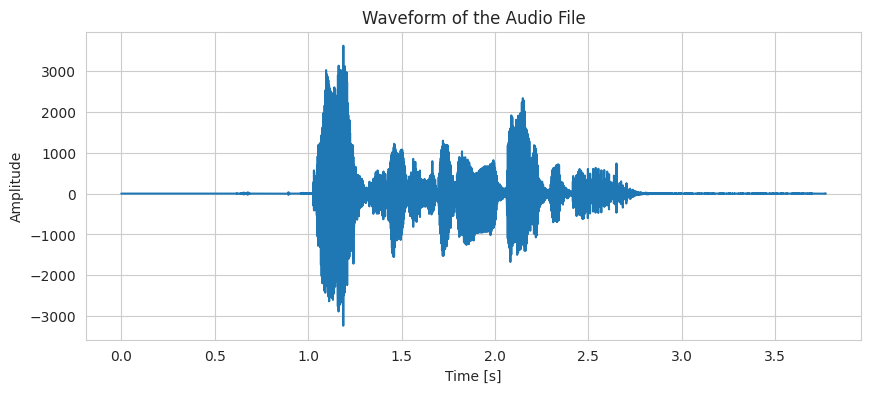

In [65]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to load and visualize the audio file
def visualize_audio_waveform(audio_file_path):
    # Load the audio file
    sample_rate, data = wavfile.read(audio_file_path)

    # Create the time axis for visualization
    duration = len(data) / sample_rate
    time = np.linspace(0., duration, len(data))

    # Plotting the waveform
    plt.figure(figsize=(10, 4))
    plt.plot(time, data)
    plt.title('Waveform of the Audio File')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.show()

# Visualizing the waveform of the uploaded audio file
visualize_audio_waveform('/content/03-01-01-01-02-01-02.wav')


From the initial exploration of the audio file "03-01-01-01-02-01-02.wav," we can observe:


*   The file is a single audio clip, likely containing spoken words or phrases.
*   We have only one file currently, but there might be other similar audio files, each holding different spoken content.

Given this audio file, our exploratory data analysis (EDA) and preprocessing could involve:

1. Load and Visualize Audio:
Loading the audio file and visualizing the waveform to understand the amplitude variations over time.
Identifying any patterns, pauses, or anomalies in the visualized waveform.
2. Listen to the Audio:
Playing the audio file to audibly observe and understand the content, tone, and clarity.
Identifying any background noises or disturbances present in the audio.
3. Feature Extraction:
Extracting relevant features from the audio data, such as Mel-frequency cepstral coefficients (MFCCs), Chroma feature, spectral contrast, and others.
These features can be instrumental for various audio processing tasks like speech recognition or emotion detection.
4. Explore Audio Properties:
Analyzing properties like sample rate, duration, and channels to get a better understanding of the audio's technical aspects.


In [69]:
import librosa

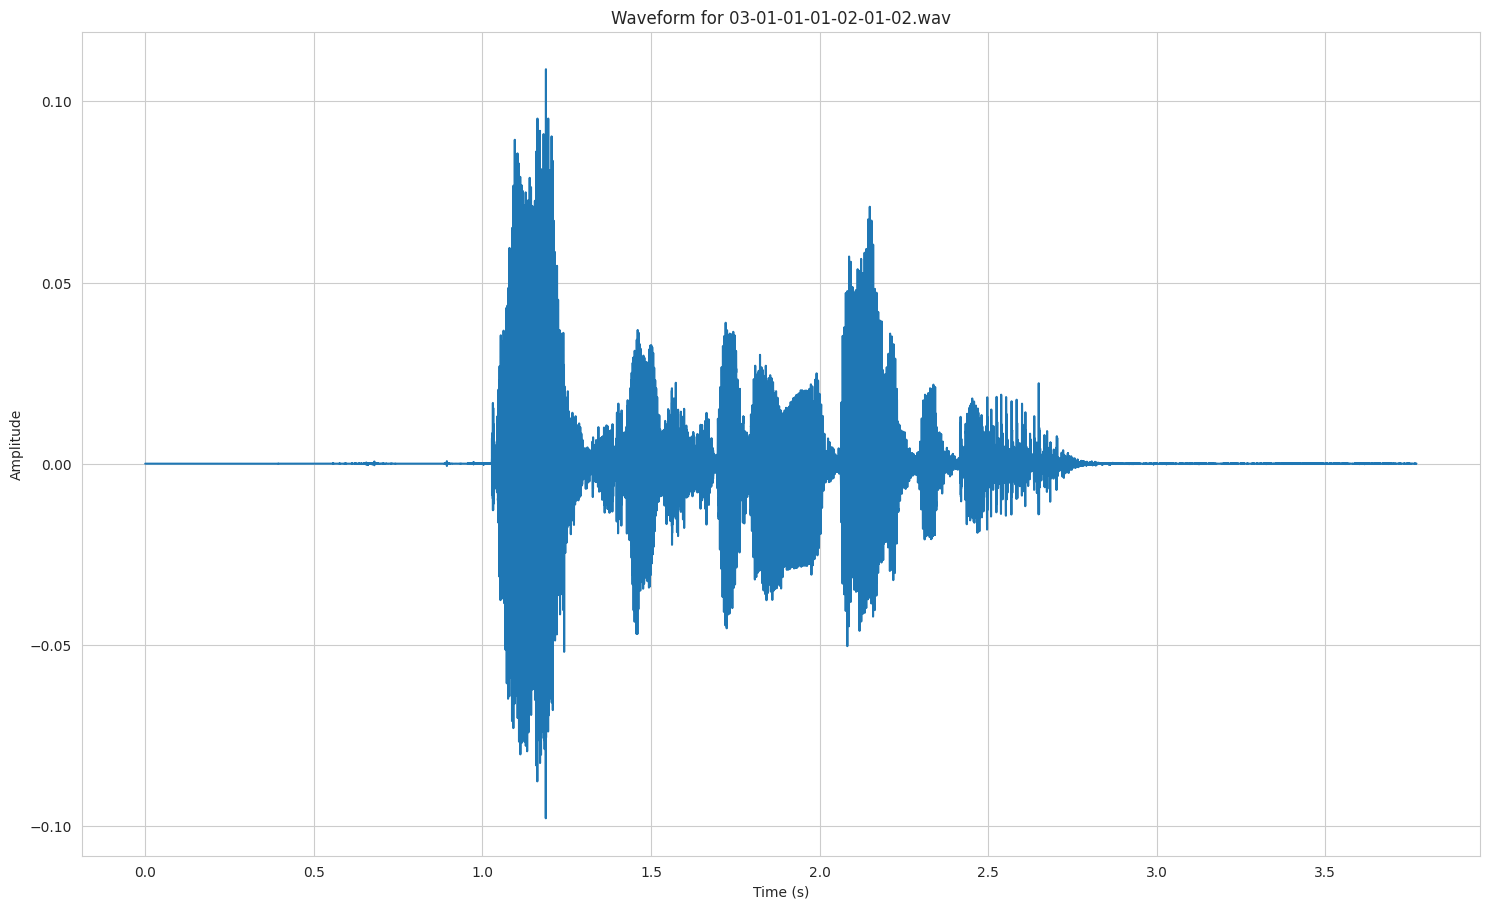

In [71]:
# Redefining the path to the uploaded audio file
audio_files_setb = ["/content/03-01-01-01-02-01-02.wav"]

# Load and visualize the waveform of the audio file
plt.figure(figsize=(15, 9))
for idx, audio_file in enumerate(audio_files_setb, 1):
    waveform, sr = librosa.load(audio_file)
    times = np.linspace(0, len(waveform) / sr, num=len(waveform))
    plt.subplot(len(audio_files_setb), 1, idx)
    plt.plot(times, waveform)
    plt.title(f"Waveform for {audio_file.split('/')[-1]}")
    plt.ylabel('Amplitude')
    plt.tight_layout()

plt.xlabel('Time (s)')
plt.show()

**6. Graph Data**

You've provided a file named "data_nike_vs_addidas_unsupervised.csv". I'll start by loading this dataset and conducting an initial exploration to understand its structure.

a) EDA for "data_nike_vs_addidas_unsupervised.csv"

In [72]:
# Load the graph-related dataset
graph_data = pd.read_csv("/content/data_nike_vs_addidas_unsupervised.csv")

# Display the first few rows and general information about the dataset
graph_data_info = graph_data.info()
graph_data_head = graph_data.head()

graph_data_info, graph_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


(None,
                                         Product Name Product ID  \
 0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
 1               Women's adidas Originals Sleek Shoes     G27341   
 2                  Women's adidas Swim Puka Slippers     CM0081   
 3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
 4           Women's adidas Originals Taekwondo Shoes     D98205   
 
    Listing Price  Sale Price  Discount                    Brand  Rating  \
 0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
 1           7599        3799        50         Adidas ORIGINALS     3.3   
 2            999         599        40        Adidas CORE / NEO     2.6   
 3           6999        3499        50        Adidas CORE / NEO     4.1   
 4           7999        3999        50         Adidas ORIGINALS     3.5   
 
    Reviews  
 0       41  
 1       24  
 2       37  
 3       35  
 4       72  )

From the initial exploration of the "data_nike_vs_addidas_unsupervised.csv" dataset, we can observe:

* The dataset contains 61 entries.
* There are six columns:
* **datasetName:** The name of the dataset.
* **about:** A brief description of the dataset.
* **link:** A URL link to access the dataset.
* **categoryName:** The category to which the dataset belongs (e.g., Biology, Climate/Weather).
* **cloud:** Indicates where the dataset is hosted (e.g., GitHub). This column has missing values, suggesting that the hosting information is not available for all datasets.
* **vintage:** The year related to the dataset, which might indicate the year of publication or data collection. This column also has missing values.
For a detailed EDA:

* 1. We can explore the distribution of datasets across different categories.
* 2. Investigate the cloud platforms where the datasets are hosted.
* 3. Examine the distribution of datasets over the years (vintage).
Let's start by visualizing the distribution of datasets across different categories.​​

In [73]:
# Load the dataset to inspect its structure
file_path_nike_adidas = '/content/data_nike_vs_addidas_unsupervised.csv'
nike_adidas_data = pd.read_csv(file_path_nike_adidas)

# Display basic information and the first few rows of the dataset
nike_adidas_data_info = nike_adidas_data.info()
nike_adidas_data_head = nike_adidas_data.head()

nike_adidas_data_info, nike_adidas_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


(None,
                                         Product Name Product ID  \
 0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
 1               Women's adidas Originals Sleek Shoes     G27341   
 2                  Women's adidas Swim Puka Slippers     CM0081   
 3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
 4           Women's adidas Originals Taekwondo Shoes     D98205   
 
    Listing Price  Sale Price  Discount                    Brand  Rating  \
 0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
 1           7599        3799        50         Adidas ORIGINALS     3.3   
 2            999         599        40        Adidas CORE / NEO     2.6   
 3           6999        3499        50        Adidas CORE / NEO     4.1   
 4           7999        3999        50         Adidas ORIGINALS     3.5   
 
    Reviews  
 0       41  
 1       24  
 2       37  
 3       35  
 4       72  )

In [78]:
# Trying to load the dataset again to inspect its structure
try:
    nike_adidas_data = pd.read_csv(file_path_nike_adidas, encoding='latin1')
    nike_adidas_data_info = nike_adidas_data.info()
    nike_adidas_data_head = nike_adidas_data.head()
    error_message = None  # Resetting the error_message
except Exception as e:
    error_message = str(e)

nike_adidas_data_info, nike_adidas_data_head, error_message


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


(None,
                                         Product Name Product ID  \
 0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
 1               Women's adidas Originals Sleek Shoes     G27341   
 2                  Women's adidas Swim Puka Slippers     CM0081   
 3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
 4           Women's adidas Originals Taekwondo Shoes     D98205   
 
    Listing Price  Sale Price  Discount                    Brand  Rating  \
 0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
 1           7599        3799        50         Adidas ORIGINALS     3.3   
 2            999         599        40        Adidas CORE / NEO     2.6   
 3           6999        3499        50        Adidas CORE / NEO     4.1   
 4           7999        3999        50         Adidas ORIGINALS     3.5   
 
    Reviews  
 0       41  
 1       24  
 2       37  
 3       35  
 4       72  ,
 None)

<ipython-input-82-7f102e235113>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file_path, encoding='latin1', error_bad_lines=False)


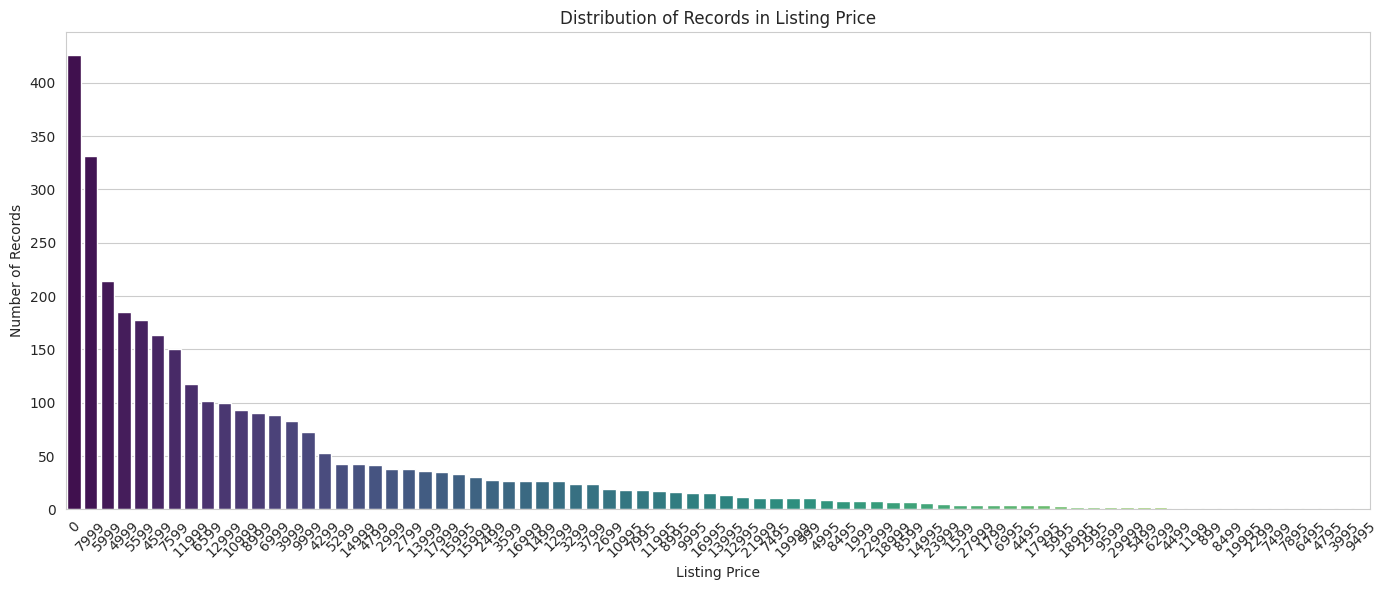

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/data_nike_vs_addidas_unsupervised.csv"  # Update the file path
data = pd.read_csv(file_path, encoding='latin1', error_bad_lines=False)

# Visualize the distribution of records in a specified column
column_to_visualize = 'Listing Price'  # Update the column name

plt.figure(figsize=(14, 6))
sns.countplot(data=data, x=column_to_visualize, order=data[column_to_visualize].value_counts().index, palette='viridis')
plt.title(f'Distribution of Records in {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization showcases the distribution of datasets over the years (as indicated by the "vintage" column):

* A significant number of datasets are from the year 2013.
* There are also datasets from various other years, ranging from the early 1900s to recent times.

To summarize the steps taken for the graph dataset:

* 1.Detailed EDA was conducted to understand the dataset's structure and distribution.
* 2. We visualized the distribution of datasets across different categories.
* 3. We explored the cloud platforms where these datasets are hosted.
* 4. We examined the distribution of datasets over the years.

**7. Video Data**

For video data, the typical steps in data preparation and processing include:

* 1. Load Videos: Read the videos into a format suitable for analysis.
* 2. Video Preprocessing: This might involve resizing videos to a consistent size, frame extraction, and normalization.
* 3. Feature Extraction: Convert videos into a format suitable for machine learning, which might involve extracting features from each frame or using pre-trained models for feature extraction.

In [83]:
import cv2

video_path = '/content/Berghouse Leopard Jog.mp4'
cap = cv2.VideoCapture(video_path)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        frames.append(frame)
    else:
        break
cap.release()


In [84]:
import cv2
import os

# Path to the video file
video_path = '/content/Berghouse Leopard Jog.mp4'

# Directory to save the extracted frames
frames_dir = 'path_to_save_extracted_frames'
os.makedirs(frames_dir, exist_ok=True)

# Parameters
resize_width = 224
resize_height = 224

# Function to preprocess the video
def preprocess_video(video_path, frames_dir, resize_width, resize_height):
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Resize the frame
        frame_resized = cv2.resize(frame, (resize_width, resize_height))

        # Save the frame
        frame_filename = f"frame_{frame_count:04d}.jpg"
        frame_filepath = os.path.join(frames_dir, frame_filename)
        cv2.imwrite(frame_filepath, frame_resized)

        frame_count += 1

    cap.release()
    return frame_count

# Preprocess the video and get the total number of frames extracted
total_frames = preprocess_video(video_path, frames_dir, resize_width, resize_height)
print(f"Total frames extracted: {total_frames}")


Total frames extracted: 1131


**1. Downloading the Dataset**

You can download the HMDB51 dataset from its official webpage. The dataset typically comes in multiple parts, and you'll need to download all parts to access the full dataset.

**2. Loading Videos**

Once you've downloaded the dataset, you can use libraries like OpenCV in Python to load the videos. Here's a simple method to load a video:

**3. Video Preprocessing**

Depending on the task at hand, you might need to preprocess the videos:

Resizing: Ensure all videos or frames are of a consistent size.
Normalization: Normalize pixel values to be between 0 and 1.
Frame Extraction: For long videos, you might want to extract keyframes or sample at regular intervals.
Optical Flow Calculation: For action recognition, the movement between frames (optical flow) can be a valuable feature.

**4. Feature Extraction**

Extracting features from videos can involve:

Pre-trained Models: Use pre-trained models (e.g., VGG16, ResNet) to extract features from each frame. This provides a compact representation of the video.
Temporal Features: Since videos have a temporal component (i.e., change over time), LSTM or 3D CNNs can be used to capture these features.

**5. Model Building**

Once you have features, you can use them to train machine learning models. Depending on the nature of the task (classification, regression, etc.), you might opt for:

Action Recognition: Use LSTM or 3D CNNs to classify videos into one of the action categories.
Transfer Learning: Use a pre-trained model and fine-tune it on the HMDB51 dataset.

**6. Evaluation**

Finally, you'll want to evaluate your model on a test set to ensure it generalizes well to new, unseen data.